In [ ]:
%reload_ext autoreload
%autoreload 2

import gymnasium as gym
from dqn_torch import Agent
import numpy as np

if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    print(env.action_space)
    agent = Agent(gamma=0.99, epsilon=1.0, batch_size=100, n_actions=2,
                  eps_end=0.01, input_dims=[4], lr=0.003) # sample 64 experiences as the minibatch from the original batch
    scores, eps_history = [],[]
    n_games = 700
    
    avg_score_record = []

    for i in range(n_games):
        score = 0
        done = False
        observation = env.reset()[0]
        agent.loss_memory_in_eps.clear() 
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info, _= env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            agent.learn()
            observation = observation_
        agent.loss_memory.append(np.mean(agent.loss_memory_in_eps))
        scores.append(score)
        eps_history.append(agent.epsilon)

        avg_score = np.mean(scores[-100:])
        avg_score_record.append(avg_score)

        print('episode ', i , 'score %.2f' % score,
              'average score %.2f' % avg_score,
              'epsilon %.2f' % agent.epsilon)
    
    
    

ModuleNotFoundError: No module named 'torch'

NameError: name 'avg_score_record' is not defined

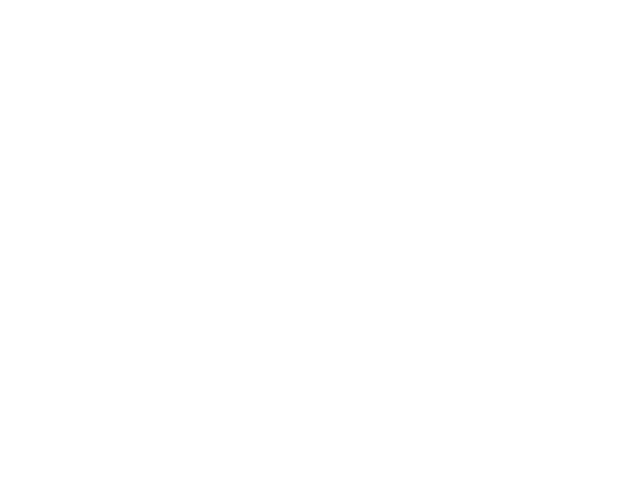

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.figure()
plt.scatter(range(1,len(avg_score_record)+1), avg_score_record)

# loss_memory = [i.detach().numpy() for i in agent.loss_memory]
plt.figure()
plt.scatter(range(1,len(agent.loss_memory)+1), agent.loss_memory)

plt.show()